### In this we will actually start with the ML algorithms

#### We will be applying few of the ML algos as specified
1. Linear Regressor
2. Lasso Regressor
3. Decision Tree
4. KNN
5. Ensemble: RandomForest,XGBoost
6. HyperParam tunning

#### Apply Deep Neural Networks as well
1. ANN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="ticks", color_codes=True)
df=pd.read_csv('Data/Real-Data/Real_Combine.csv')

In [2]:
df.head(10)

T    TM    Tm     SLP     H   VV    V    VM      PM 2.5
0   7.4   9.8   4.8  1017.6  93.0  0.5  4.3   9.4  219.720833
1   7.8  12.7   4.4  1018.5  87.0  0.6  4.4  11.1  182.187500
2   6.7  13.4   2.4  1019.4  82.0  0.6  4.8  11.1  154.037500
3   8.6  15.5   3.3  1018.7  72.0  0.8  8.1  20.6  223.208333
4  12.4  20.9   4.4  1017.3  61.0  1.3  8.7  22.2  200.645833
5  16.0  25.2  10.0  1013.2  79.0  0.6  4.8  11.1  285.225000
6  13.4  21.0   9.2  1015.1  87.0  0.5  1.5   7.6  236.825000
7  14.3  22.6   6.6  1016.3  76.0  0.8  0.4   3.5  276.908333
8  12.7  18.9   7.3  1021.2  76.0  1.8  6.1  16.5  108.000000
9  11.9  18.9   6.3  1020.1  76.0  1.1  8.3  20.6  107.625000

In [3]:
df.isnull().sum()#Check for null vals

T         0
TM        0
Tm        0
SLP       0
H         0
VV        0
V         0
VM        0
PM 2.5    1
dtype: int64

In [4]:
df['PM 2.5'].fillna(df['PM 2.5'].median(),inplace=True)

In [5]:
#lets divide data in two features x,y which is independent,dependent
x=df.iloc[:,:-1]
y=df.iloc[:,-1]#-1 gives last column

In [6]:
df.corr()

T        TM        Tm       SLP         H        VV         V  \
T       1.000000  0.967323  0.958872 -0.884778 -0.520629  0.622441  0.326463   
TM      0.967323  1.000000  0.896628 -0.829935 -0.601433  0.598028  0.320478   
Tm      0.958872  0.896628  1.000000 -0.909582 -0.317057  0.560399  0.313298   
SLP    -0.884778 -0.829935 -0.909582  1.000000  0.277007 -0.491837 -0.346481   
H      -0.520629 -0.601433 -0.317057  0.277007  1.000000 -0.475249 -0.399293   
VV      0.622441  0.598028  0.560399 -0.491837 -0.475249  1.000000  0.403044   
V       0.326463  0.320478  0.313298 -0.346481 -0.399293  0.403044  1.000000   
VM      0.287869  0.300257  0.260067 -0.300552 -0.371552  0.347714  0.760858   
PM 2.5 -0.626592 -0.567100 -0.667945  0.613748  0.173528 -0.628315 -0.354522   

              VM    PM 2.5  
T       0.287869 -0.626592  
TM      0.300257 -0.567100  
Tm      0.260067 -0.667945  
SLP    -0.300552  0.613748  
H      -0.371552  0.173528  
VV      0.347714 -0.628315  
V       0.760858 -0.354522  
VM      1.000000 -0.283344  
PM 2.5 -0.283344  1.000000

<AxesSubplot:>

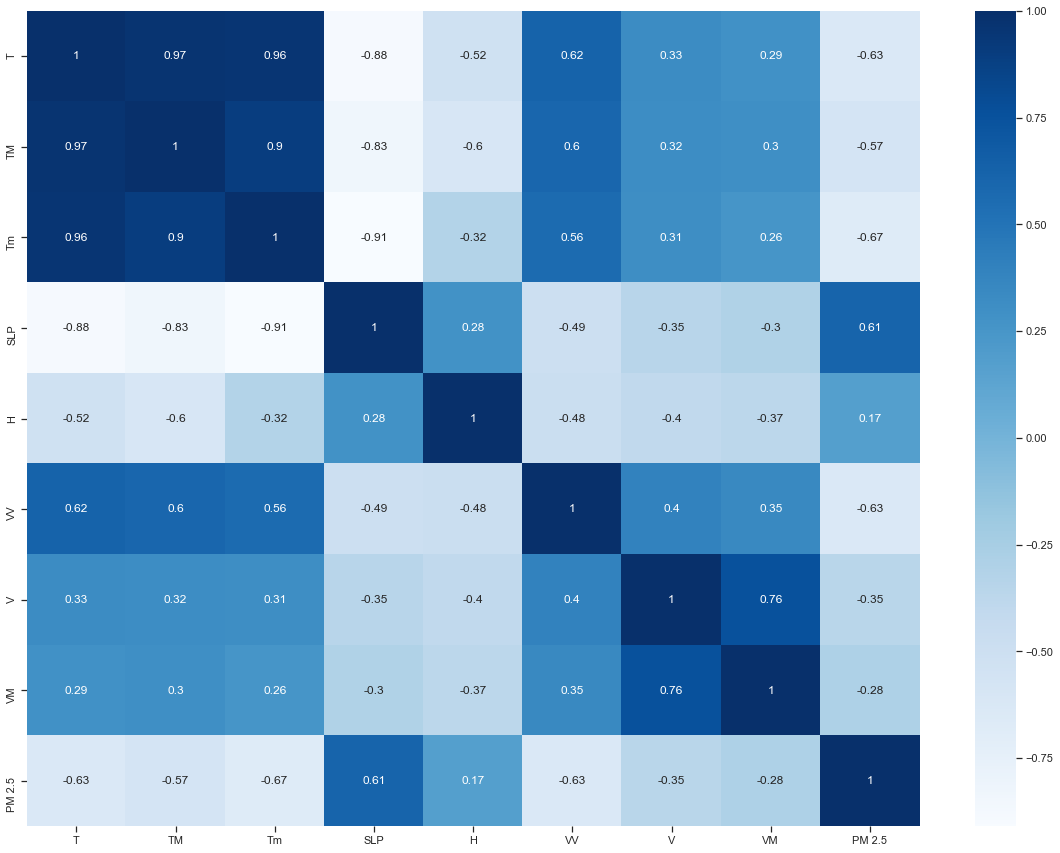

In [7]:
#lets see this on a heatmap now
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),cmap='Blues',annot=True)

#### So here we can actually see good corr and few corrs which are not high values this also says how the features are with each other

In [8]:
#Now lets look at the features and gain some more information
from sklearn.ensemble import ExtraTreesRegressor
etr=ExtraTreesRegressor(random_state=0,n_jobs=-1)
etr.fit(x,y)

ExtraTreesRegressor(n_jobs=-1, random_state=0)

<AxesSubplot:>

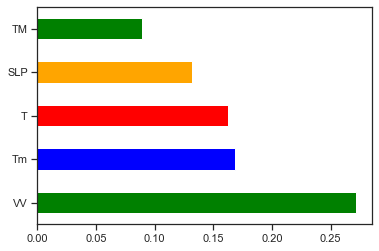

In [9]:
etr.feature_importances_#these values are with respect to the o/p feature where it defines how the features like t,tm,..are affecting or collaborating 
##Lets plot the values
ImpFeatures=pd.Series(etr.feature_importances_,index=df.columns[:-1])
ImpFeatures.sort_values(ascending=False,inplace=True)
ImpFeatures.nlargest(5).plot.barh(color=['green','blue','red','orange'])

#### Decision tree

In [16]:
#lets start with train-test-split
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [17]:
x_train,x_test,y_train,y_test=train_test_split((x),(y),test_size=0.3,random_state=0)

In [18]:
dtree=DecisionTreeRegressor(criterion='mse')
dtree.fit(x_train,y_train)

DecisionTreeRegressor()

In [15]:
print("Coefficient of Determination r^2  on train set {}".format(dtree.score(x_train,y_train)))

Coefficient of Determination r^2  on train set 1.0


In [16]:
print("Coefficient of Determination r^2  on train set {}".format(dtree.score(x_test,y_test)))

Coefficient of Determination r^2  on train set 0.3630330772940562


#### This score is very bad cause this is a classic Decision tree overfiting problem meaning a deep tree trying to fit everything

In [19]:
from sklearn.model_selection import cross_val_score
validate=cross_val_score(dtree,x,y,cv=5)

In [18]:
validate.mean()

0.042007645482535036

### Tree Visualization

Lets see a DT now with the help of graphwiz and other libs

In [23]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus

In [24]:
feature=list(df.columns[:-1])
feature

['T', 'TM', 'Tm', 'SLP', 'H', 'VV', 'V', 'VM']

In [27]:
import os

os.environ['PATH']=os.environ['PATH']+";"+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

In [28]:
dot_data=StringIO()
export_graphviz(dtree,out_file=dot_data,feature_names=feature,filled=True,rounded=True)#provide model and whatever o/p is fill it in dot_data

graph=pydotplus.graph_from_dot_data(dot_data.getvalue())#take from dot_data and create a graph
Image(graph.create_png())#create png

In [35]:
#so this didnt work out lets do this differently
# from sklearn import tree
# text_prep=tree.export_text(dtree)
# print(text_prep)

In [36]:
# fig=plt.figure(figsize=(40,40))
# _=tree.plot_tree(dtree,feature_names=feature,class_names=df.columns[-1],filled=True)

#### Hyper param tunning

In [54]:
#param tunning for DT
params={
    'splitter':['best','random'],
    'max_depth':[3,4,5,6,7,8,9,10,11,12,15],
    'min_samples_leaf':[1,2,3,4,5],
    'min_weight_fraction_leaf':[0.1,0.2,0.3,0.4],
    'max_features':['auto','log2','sqrt',None],
    'max_leaf_nodes':[None,10,20,30,40,50,60,70]
}

In [9]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [56]:
random_score=RandomizedSearchCV(dtree,params,n_jobs=-1,cv=10,verbose=3,scoring='neg_mean_squared_error')

In [57]:
random_score.fit(x_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


RandomizedSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10,
                                                      11, 12, 15],
                                        'max_features': ['auto', 'log2', 'sqrt',
                                                         None],
                                        'max_leaf_nodes': [None, 10, 20, 30, 40,
                                                           50, 60, 70],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_weight_fraction_leaf': [0.1, 0.2,
                                                                     0.3, 0.4],
                                        'splitter': ['best', 'random']},
                   scoring='neg_mean_squared_error', verbose=3)

In [58]:
random_score.best_params_

{'splitter': 'best',
 'min_weight_fraction_leaf': 0.1,
 'min_samples_leaf': 5,
 'max_leaf_nodes': 30,
 'max_features': None,
 'max_depth': 15}

In [59]:
random_score.best_score_

-2849.1736771961378

In [66]:
grid_score=GridSearchCV(dtree,params,n_jobs=-1,cv=10,verbose=3,scoring='neg_mean_squared_error')
grid_score.fit(x_train,y_train)

Fitting 10 folds for each of 14080 candidates, totalling 140800 fits


GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 15],
                         'max_features': ['auto', 'log2', 'sqrt', None],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_weight_fraction_leaf': [0.1, 0.2, 0.3, 0.4],
                         'splitter': ['best', 'random']},
             scoring='neg_mean_squared_error', verbose=3)

In [67]:
grid_score.best_params_

{'max_depth': 10,
 'max_features': 'log2',
 'max_leaf_nodes': 50,
 'min_samples_leaf': 2,
 'min_weight_fraction_leaf': 0.1,
 'splitter': 'best'}

In [68]:
grid_score.best_score_

-2772.126528494167

#### So we can see grid performed better than random so this is what we will use

In [70]:
y_pred=grid_score.predict(x_test)

In [31]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [73]:
print('MAE is :{}'.format(mean_absolute_error(y_test,y_pred)))
print('MSE is :{}'.format(mean_squared_error(y_test,y_pred)))
print('RMSE is :{}'.format(np.sqrt(mean_squared_error(y_test,y_pred))))

MAE is :43.03318926936186
MSE is :3726.3435360385292
RMSE is :61.043783762464535


C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

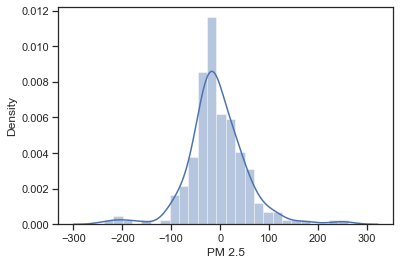

In [74]:
sns.distplot(y_test-y_pred)

In [75]:
### that is nearly bell curve or normalized

In [76]:
import pickle

file=open('decision_tree_regressor.pkl','wb')

pickle.dump(grid_score,file)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#### Lets now start with the Random Forest Regressor

In [35]:
#lets start with train-test-split
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [36]:
x_train,x_test,y_train,y_test=train_test_split((x),(y),test_size=0.3,random_state=0)

In [37]:
rand_reg=RandomForestRegressor()

In [38]:
rand_reg.fit(x_train,y_train)

RandomForestRegressor()

In [39]:
print("Coefficient of Determination r^2  on train set {}".format(rand_reg.score(x_train,y_train)))

Coefficient of Determination r^2  on train set 0.9528986038264194


In [40]:
print("Coefficient of Determination r^2  on train set {}".format(rand_reg.score(x_test,y_test)))

Coefficient of Determination r^2  on train set 0.5849359403814351


#### Great this is kind of nice score beacuse the randomforest uses many dts to make the overfiting to lessen so we get good scores

In [41]:
score_randomForest=cross_val_score(rand_reg,x_train,y_train,cv=5)

In [42]:
score_randomForest.mean()

0.6525860917714024

#### Suprisingly we got better value using the cross val this maybe caused due to possibility that the overfiting has decreased a lot since the parallel working of the dts will have different datasets given over 5 itterations

In [43]:
predictor=rand_reg.predict(x_test)

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

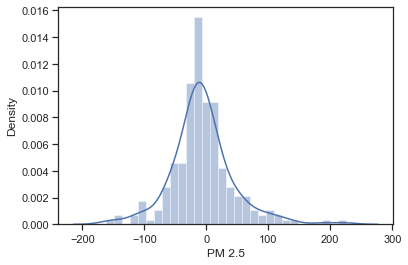

In [44]:
sns.distplot(y_test-predictor)

#### This graph is also near bell curved

In [45]:
## Use Hyperparam optimization to get the best score

#number of trees
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]#num specifies number of trees

#Number of feature to consider while spliting
max_feature=['auto','sqrt']

#Maximum number of levels in tree
max_depth=[int(x) for x in np.linspace(5,30,num=8)]

#minimum number of samples required to split a node
min_sample_split=[2,5,10,15,20]

#minimum number of samples required at each leaf node
min_sample_leaf=[1,2,4,5,10]

In [46]:
#creating the params
params={
    'n_estimators':n_estimators,
    'max_features':max_feature,
    'max_depth':max_depth,
    'min_samples_split':min_sample_split,
    'min_samples_leaf':min_sample_leaf
}

In [47]:
#As we saw that gridsearch cv was performing better than rndmonsearch cv in DT so we will use both here as well but aim for grid
grid_rfr=RandomizedSearchCV(rand_reg,params,n_jobs=-1,verbose=3,cv=10,scoring='neg_mean_squared_error',n_iter=100,random_state=42)

In [48]:
grid_rfr.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [5, 8, 12, 15, 19, 22, 26,
                                                      30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=3)

In [49]:
randomsearch_randomfor=grid_rfr

In [50]:
randomsearch_randomfor.best_params_

{'n_estimators': 300,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 26}

In [51]:
randomsearch_randomfor.best_score_

-2368.8490432296608

In [52]:
y_pred_rfr_randomcv=randomsearch_randomfor.predict(x_test)

In [53]:
grid_rfr=GridSearchCV(rand_reg,params,n_jobs=-1,verbose=3,cv=10,scoring='neg_mean_squared_error')

In [ ]:
grid_rfr.fit(x_train,y_train)#Do not execute takes more than 2 hrs

In [54]:
print('MAE is :{}'.format(mean_absolute_error(y_test,y_pred_rfr_randomcv)))
print('MSE is :{}'.format(mean_squared_error(y_test,y_pred_rfr_randomcv)))
print('RMSE is :{}'.format(np.sqrt(mean_squared_error(y_test,y_pred_rfr_randomcv))))

MAE is :36.19246333463531
MSE is :2605.8493089366875
RMSE is :51.047520105649475


In [55]:
import pickle

file=open('Random_forest_regressor.pkl','wb')

pickle.dump(rand_reg,file)

------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### XGBoost Regressor

In [6]:
#lets start with train-test-split
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

In [10]:
x_train,x_test,y_train,y_test=train_test_split((x),(y),test_size=0.3,random_state=0)

In [11]:
xgbreg=XGBRegressor()
xgbreg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [12]:
print("Coefficient of Determination r^2  on train set {}".format(xgbreg.score(x_train,y_train)))

Coefficient of Determination r^2  on train set 0.999818477582025


In [13]:
print("Coefficient of Determination r^2  on train set {}".format(xgbreg.score(x_test,y_test)))

Coefficient of Determination r^2  on train set 0.5787500673401134


In [20]:
score_xgb=cross_val_score(xgbreg,x_train,y_train,cv=5,n_jobs=-1)

In [21]:
score_xgb.mean()

0.6176973693285316

In [22]:
y_pred_xgb=xgbreg.predict(x_test)

C:\Users\Shreyas\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='PM 2.5', ylabel='Density'>

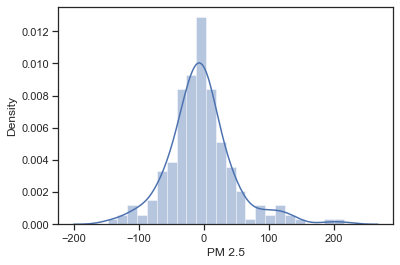

In [23]:
sns.distplot(y_test-y_pred_xgb)

##### Hyperparam optimization

In [24]:
#many of the params for RF and XGBReg are quite similar 
#Number of trees
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=24)]

#The alpha or learning rate to calc new probability value
learning_rate=[float(x) for x in np.linspace(start=0.01,stop=0.1,num=9)]

#max depth gives maximum depth of a dt
max_depth=[int(x) for x in np.linspace(start=5,stop=30,num=12)]

#Subsample ratio like say d is whole x_train so m(d)=subsample where m!=1
subsample=[0.7,0.8,0.9,0.6]

#minimum weight required for a child node so 3 means 3 types of instances are necessary otherwise leaf 
min_child_weight=[3,4,5,6,7]

params_xgb={
    'n_estimators':n_estimators,
    'learning_rate':learning_rate,
    'max_depth':max_depth,
    'subsample':subsample,
    'min_child_weight':min_child_weight
}



In [25]:
random_cv_xgb=RandomizedSearchCV(xgbreg,param_distributions=params_xgb,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,n_iter=100,verbose=3,random_state=42)

In [26]:
random_cv_xgb.fit(x_train,y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


RandomizedSearchCV(cv=10,
                   estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                          colsample_bylevel=1,
                                          colsample_bynode=1,
                                          colsample_bytree=1,
                                          enable_categorical=False, gamma=0,
                                          gpu_id=-1, importance_type=None,
                                          interaction_constraints='',
                                          learning_rate=0.300000012,
                                          max_delta_step=0, max_depth=6,
                                          min_child_weight=1, missing=nan,
                                          monotone_constraints='()',
                                          n_estimat...
                                                          0.043750000000000004,
                                                          0.05500000

In [27]:
random_cv_xgb.best_params_

{'subsample': 0.7,
 'n_estimators': 100,
 'min_child_weight': 6,
 'max_depth': 5,
 'learning_rate': 0.043750000000000004}

In [28]:
random_cv_xgb.best_score_

-2348.512408551449

In [33]:
import pickle

file=open('xgbregressor.pkl','wb')

pickle.dump(xgbreg,file)

In [32]:
print('MAE is :{}'.format(mean_absolute_error(y_test,y_pred_xgb)))
print('MSE is :{}'.format(mean_squared_error(y_test,y_pred_xgb)))
print('RMSE is :{}'.format(np.sqrt(mean_squared_error(y_test,y_pred_xgb))))

MAE is :36.31856361620354
MSE is :2647.4255966270757
RMSE is :51.45313981310641
